## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers
#### Observations

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\fairo\Downloads\London Airbnb'

In [4]:
df = pd.read_csv(os.path.join(path, 'listings_clean.csv' ), index_col = 0)

### 2. Data cleaning

In [5]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [6]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,16,6/10/2019,0.15,3,347
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,85,5/5/2019,0.73,1,203
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,Westminster,51.52098,-0.14002,Entire home/apt,300,3,41,6/19/2019,0.41,14,269
3,24328,Battersea bedroom & office w parking shared ga...,41759,Joe,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,93,6/8/2019,0.88,1,329
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,Wandsworth,51.44687,-0.21874,Entire home/apt,65,4,28,6/22/2019,0.69,1,2


In [7]:
df.isnull().sum()

listing_id                            0
name                                 26
host_id                               0
host_name                            47
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       21023
reviews_per_month                 21023
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Creating a subset with just the variables needed 
df2 = df.drop(columns = ['listing_id', 'host_id','name', 'host_name', 'last_review', 'reviews_per_month'])

##### Extreme values checks

C:\Users\fairo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

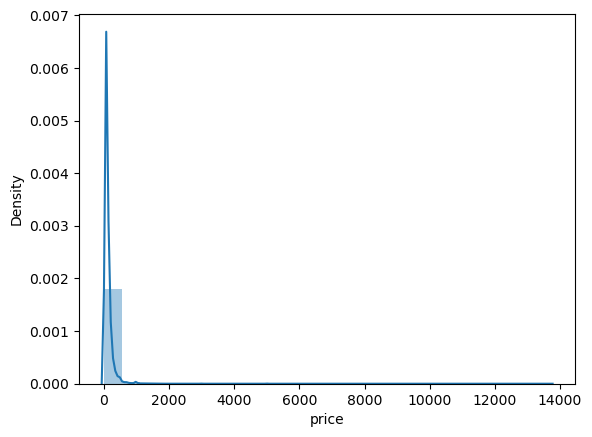

In [10]:
sns.distplot(df2['price'], bins=25) 

As seen in the previous tasks, there seem to be many outliers and extremes values in the price values (from 2000 till 14000).

In [12]:
 # Check the mean
df['price'].mean() 

121.65630292188432

In [13]:
# Check the median
df['price'].median() 

81.0

In [14]:
 # Check the max
df['price'].max()

13700

The maximum price value is pretty far from the mean and the median, which confirms the presence of outliers here, but it's probably not caused by an issue in data quality, but rather the fact that are extremely expensive airbnbs in London.

### 3. Data prep for regression analysis 

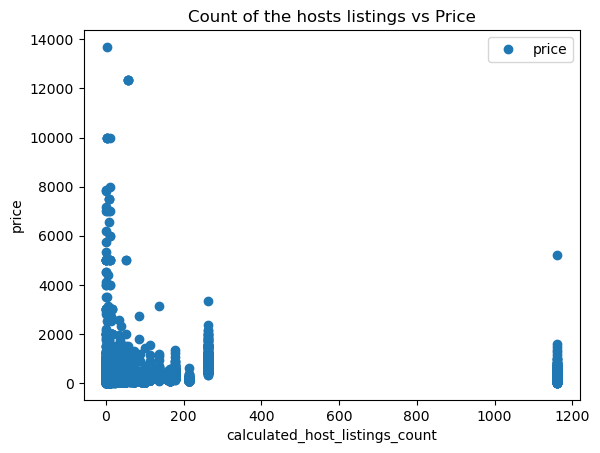

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'calculated_host_listings_count', y='price',style='o')
plt.title('Count of the hosts listings vs Price')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('price')  
plt.show()

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['calculated_host_listings_count'].values.reshape(-1,1)
y = df2['price'].values.reshape(-1,1)

In [20]:
X

array([[ 3],
       [ 1],
       [14],
       ...,
       [18],
       [18],
       [18]], dtype=int64)

In [21]:
y

array([[ 65],
       [100],
       [300],
       ...,
       [ 78],
       [ 82],
       [ 72]], dtype=int64)

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

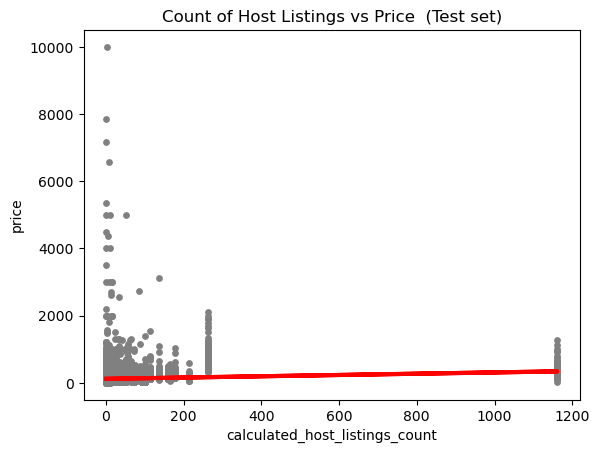

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Count of Host Listings vs Price  (Test set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('price')
plot_test.show()

It doesn't seem to be a strong relationship between the number of listings that a host has and the Airbnb prices, but than again, it can be skewed by the many outliers.  

The number of listings a host has, can be indicatif of his/her professionalism, rather than a just a person that is renting the Airbnb (with its positives and negatives), it can be proof that the Airbnb is being rented by an agency or some sort that offers several listings and therefore can explain the high price.  

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [29]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19116346]]
Mean squared error:  36185.26225207249
R2 score:  0.019623625552418367


The slope here means that as the number of the host's listings increase, the prices also slightly increase at a degree of 0.191.

The MSE is quite large, we can say that a regression may not be the best model to represent this data and can’t accurately predict the influence of the number of listings on the price of the Airbnb.

And Finally, the R2 score is very weak, which confirms that the model is not a great fit. 


In [30]:
y_predicted

array([[117.55036449],
       [118.12385488],
       [125.57923001],
       ...,
       [117.74152795],
       [123.09410496],
       [117.55036449]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,85,117.550364
1,44,118.123855
2,195,125.579230
3,100,117.550364
4,175,117.741528
5,99,117.550364
6,35,117.550364
7,189,121.564797
8,44,136.857874
9,300,119.844326


There's quite the difference between the actual and predicted y values. Which adds evidence to the fact that this model isn’t doing a great job of explaining the relationship between these two variables.The relationship simply doesn’t follow a single, straight regression line.

##### Compare how the regression fits the training set

In [32]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [33]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19116346]]
Mean squared error:  55756.75598230111
R2 score:  0.012054220233157387


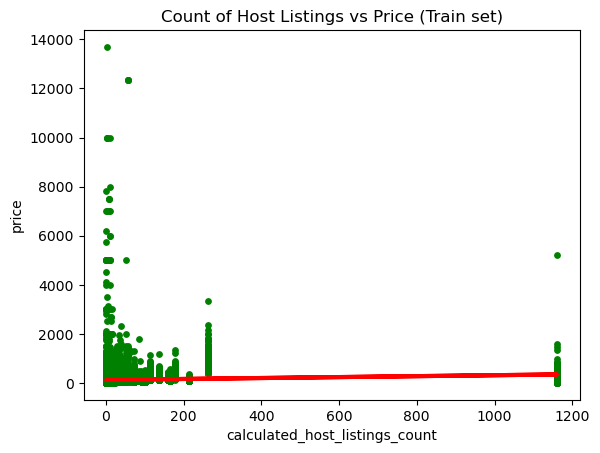

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Count of Host Listings vs Price (Train set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [36]:
# Clean the extreme values from the "Price" variable observed during the consistency checks.

df_test = df[df['price'] <=400] 

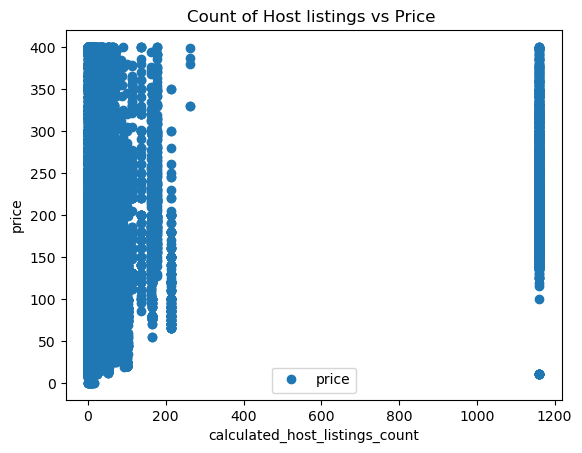

In [37]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'calculated_host_listings_count', y='price', style='o')  
plt.title('Count of Host listings vs Price ')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('price')  
plt.show()

In [47]:
df_test = df[(df['price'] <=400) & (df['calculated_host_listings_count'] <300)]

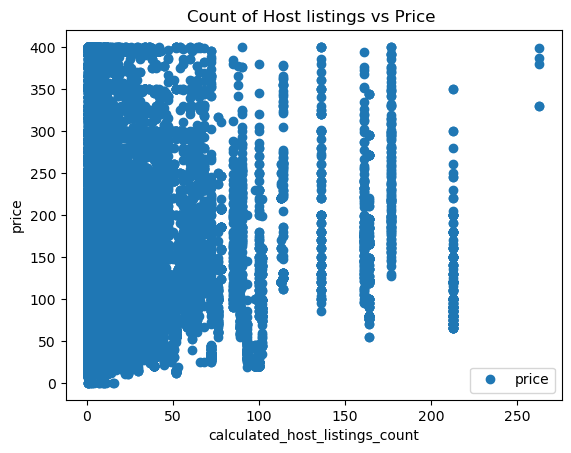

In [48]:
df_test.plot(x = 'calculated_host_listings_count', y='price', style='o')  
plt.title('Count of Host listings vs Price ')  
plt.xlabel('calculated_host_listings_count')  
plt.ylabel('price')  
plt.show()

The column 'calculated_host_listings_count' had seemingly a single outlier that distorted the outcome, so I created another dataframe test to see if it makes any diffrence. 

We can clearly see that was the case, and we have a more readable outcome.

In [49]:
# Reshape again.

X_2 = df_test['calculated_host_listings_count'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [50]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [51]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [52]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [53]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65779737]]
Mean squared error:  4911.279676263777
R2 score:  0.04559069842403052


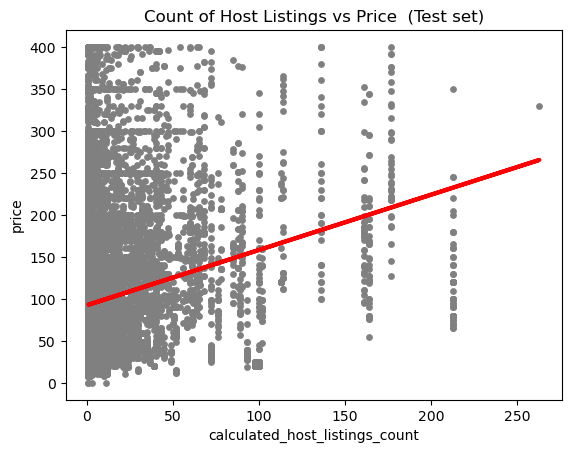

In [55]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Count of Host Listings vs Price  (Test set)')
plot_test.xlabel('calculated_host_listings_count')
plot_test.ylabel('price')
plot_test.show()

The regression Line seems to be more on the postive trend than before, but there is still too many data points outside the line. 

In [56]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,60,93.601098
1,75,97.547883
2,100,101.494667
3,22,92.943301
4,55,92.943301
5,65,92.943301
6,80,93.601098
7,35,94.916693
8,40,94.258896
9,119,96.232288


Even without the outliers, there is still a big difference between the actual and predicted values.

### Observations

We can rule out the hypothesis, “the more listings a host has, the higher the price.” As it turns out, this statement is only partially true. There’s still a lot of variance in the data that can’t be explained by the linear relationship between these two variables. 

We should continue with other hypotheses that more accurately represent the data. 